#EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [2]:
path = '/content/heart_cleveland_upload.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
data.groupby(['condition']).count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
condition,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf128ec4d0>,
      dtype=object)

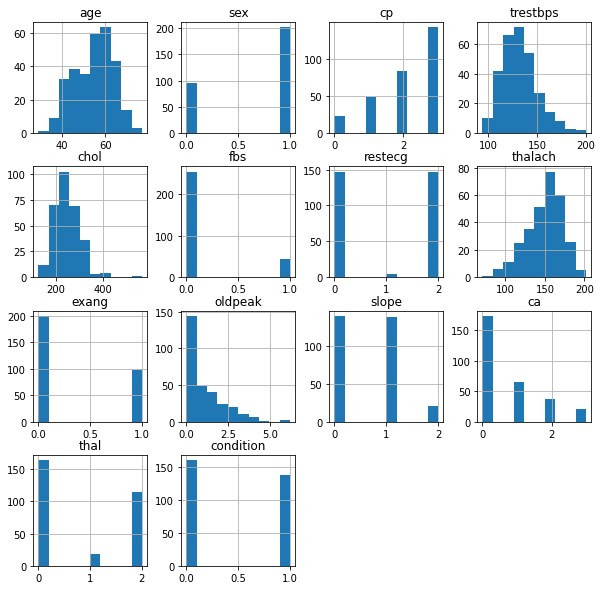

In [6]:
data.hist(figsize = (10, 10))

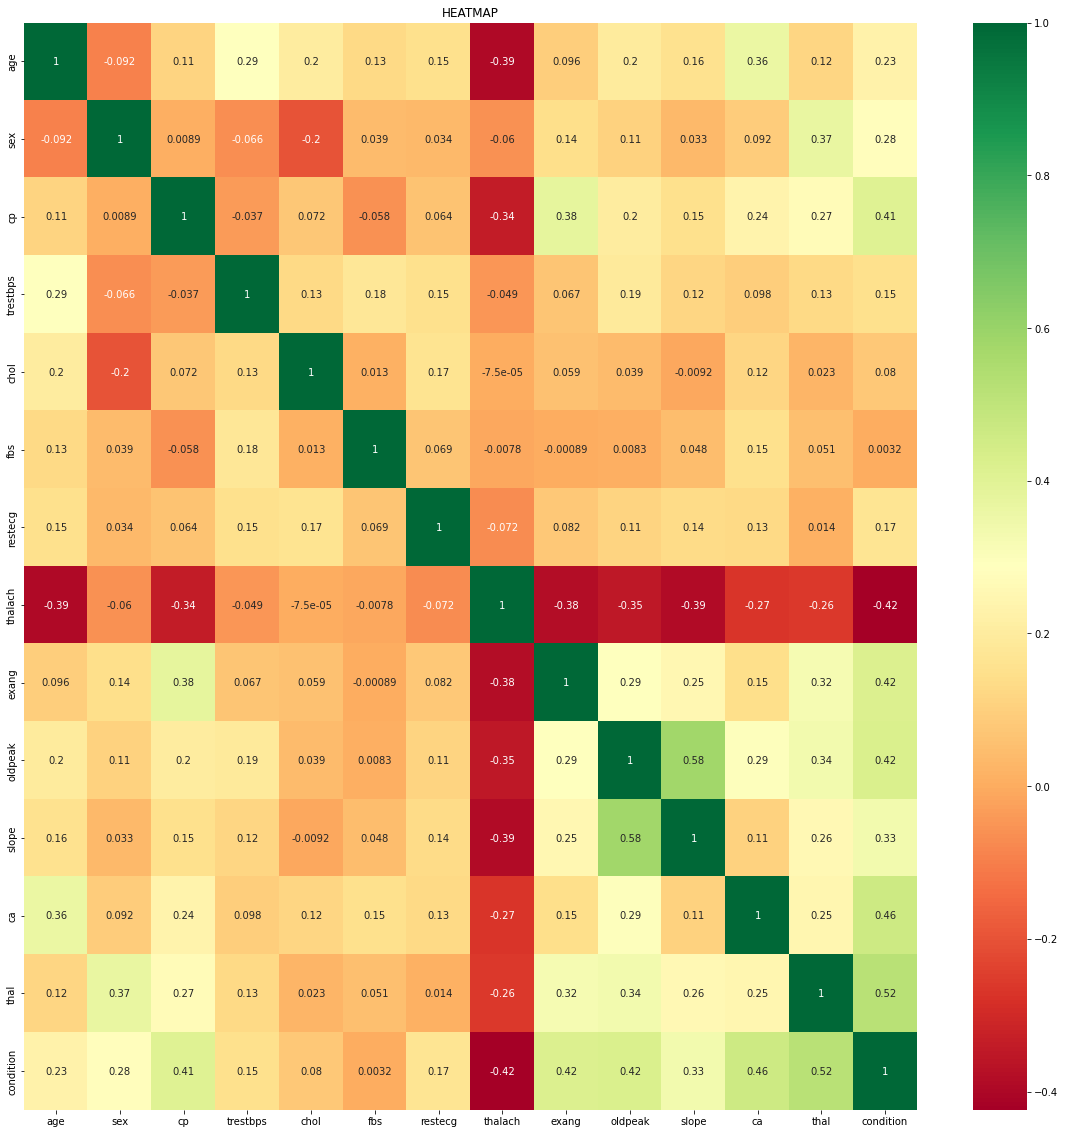

In [7]:
cor=data.corr()
top_corr_feature=cor.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

In [8]:
data=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
data.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,160,234,131,0.1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,140,239,151,1.8,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,150,226,114,2.6,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,110,211,144,1.8,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0


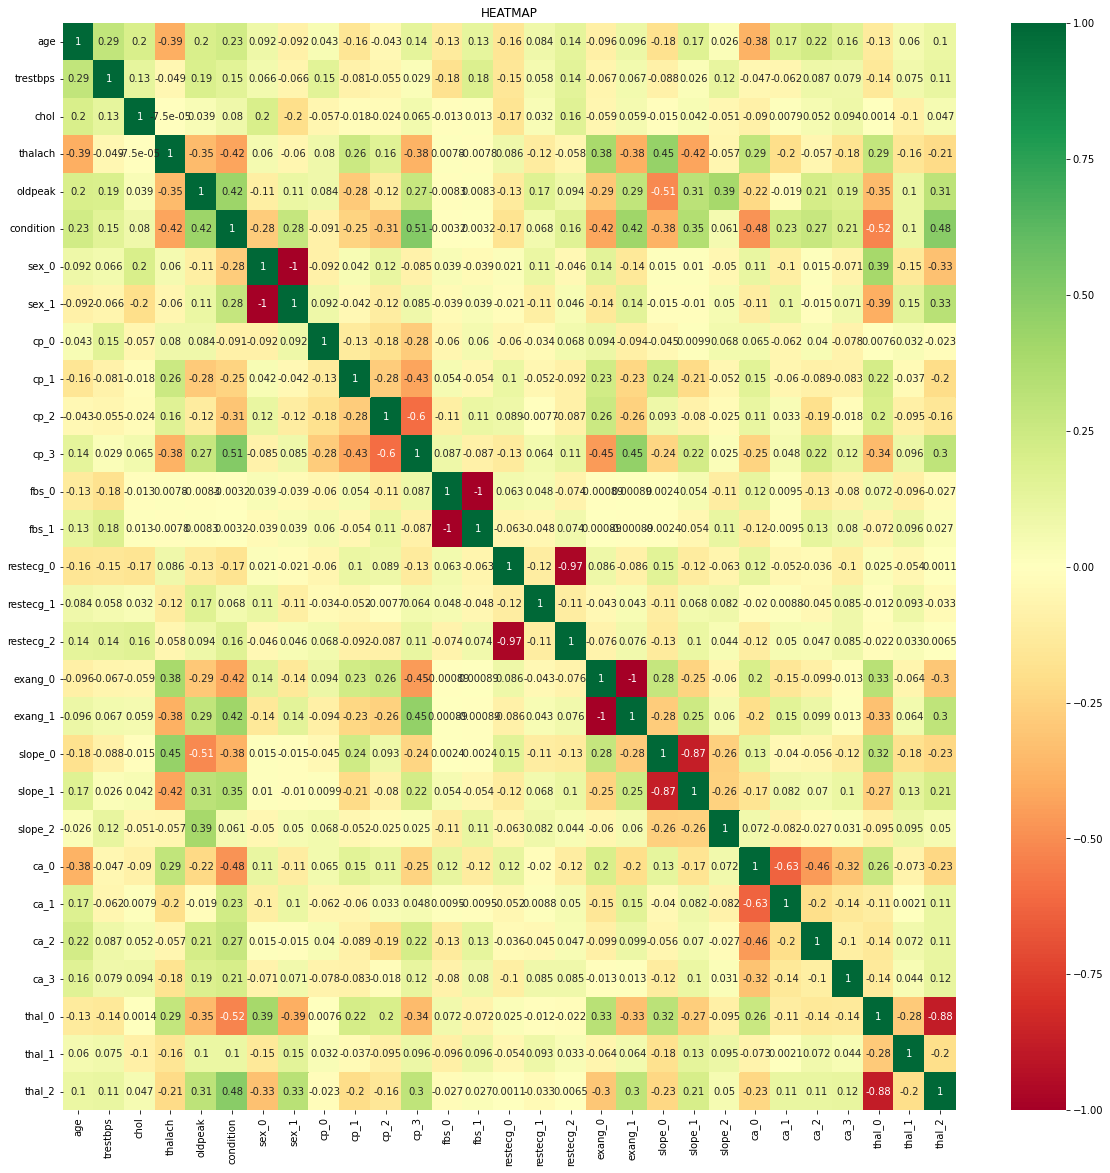

In [9]:
cor=data.corr()
top_corr_feature=cor.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

##Split data and train model

In [10]:
from sklearn.model_selection import train_test_split

y=data['condition']
X=data.drop(['condition'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###Normalize data

In [11]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
X_train_norm = transformer.fit_transform(X_train)  
X_test_norm = transformer.transform(X_test)

##SGD

In [16]:
from sklearn.linear_model import SGDClassifier
est = SGDClassifier(random_state=42, max_iter=50)

est.fit(X_train_norm, y_train)
y_pred = est.predict(X_test_norm)
from sklearn.metrics import classification_report
print(classification_report(y_train, est.predict(X_train_norm)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68       128
           1       0.63      0.83      0.71       109

    accuracy                           0.70       237
   macro avg       0.71      0.71      0.69       237
weighted avg       0.72      0.70      0.69       237

              precision    recall  f1-score   support

           0       0.63      0.38      0.47        32
           1       0.51      0.75      0.61        28

    accuracy                           0.55        60
   macro avg       0.57      0.56      0.54        60
weighted avg       0.58      0.55      0.54        60



##XGBoost

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, n_estimators = 30)


#log_reg = dask_ml.linear_model.LogisticRegression()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       128
           1       1.00      0.96      0.98       109

    accuracy                           0.98       237
   macro avg       0.98      0.98      0.98       237
weighted avg       0.98      0.98      0.98       237

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, random_state=0)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.97      0.99       109

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



##Feature importance

In [49]:
from sklearn.inspection import permutation_importance

feature_names = [f"{name}" for name in X.columns.values]

result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

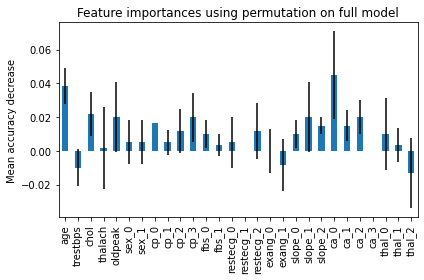

In [50]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [60]:
data_cut = data[['age','chol','oldpeak','cp_0','cp_3','ca_0','ca_2','slope_1']]
y1=data['condition']
X1=data.drop(['condition'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)


In [70]:
rfc = RandomForestClassifier(max_depth=7, random_state=0)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.97      0.99       109

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

